# Part I - (201902_fordgobike_tripdata Dataset)
## by (Abiola Paul ADJICHEBOUTOU)

## Introduction
For this project we are using 201902_fordgobike_tripdata Dataset.
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('201902_fordgobike_tripdata.csv')

In [3]:
# high-level overview of data shape and composition
df.shape

(183412, 16)

In [4]:
#df.sample(20)

In [9]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# descriptive statistics for numeric variables
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Structure of my dataset:

Ce dataset contient 183412 entrees avec 16 variables, parmi lesquelles nous avons duration_sec,bike_id,start_station_latitude	start_station_longitude end_station_longitude member_birth_year,user_type','member_gender','bike_share_for_all_trip. Most variables are numeric in nature

### The main features of interest in my dataset:
    I'm most interested in figuring out what features are best for answering the following questions in the dataset.
- How long does the average trip take?
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- what is the proportion of subscriber and customer in the dataset?
- Are the cyclists mostly male or female?
##### Pour repondre aux questions ci-dessus les variables qui me seront plus utiles sont: duration_sec,start_time,end_time,user_type et longitude, latitude and user_type

### Features in the dataset that will help support my investigation into my features of interest:

duration_sec,start_time,end_time,user_type et longitude, latitude, member_gender and user_type features are the best variables to be used in answering the above questions

- ##### How long does the average trip take?

In [10]:
# la duree en second de average trip
df.duration_sec.mean()

726.078435434977

De la cellule precedente, on peut conclure que le voyage moyen prend 726.08 seconds

- ##### When are most trips taken in terms of time of day, day of the week, or month of the year?

In [15]:
#print(df.groupby(by=['start_time', 'end_time']).sum().groupby(level=[0]).cumsum())

In [18]:
columns=['start_time', 'end_time']
df[columns]

start_time                  end_time
0       2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750
1       2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560
2       2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460
3       2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420
4       2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740
...                          ...                       ...
183407  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340
183408  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020
183409  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200
183410  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870
183411  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580

[183412 rows x 2 columns]

In [19]:
df.loc[:,['start_time', 'end_time']].min()

start_time    2019-02-01 00:00:20.6360
end_time      2019-02-01 00:04:52.0580
dtype: object

In [20]:
df.loc[:,['start_time', 'end_time']].max()

start_time    2019-02-28 23:59:18.5480
end_time      2019-03-01 08:01:55.9750
dtype: object

- **Des calculs precedents, il ressort que le voyage le plus long est de 2 jours (28 fevreier au 01 mars 2019)**

## Univariate Exploration

I'll start by looking at the distribution of the main variables of interest:

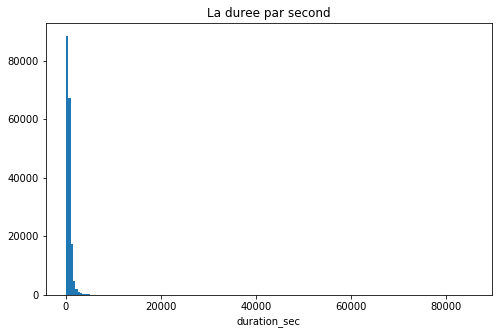

In [15]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('duration_sec')
plt.title("La duree par second")
plt.show()

**Let's plot all five ordinal variables to get an idea of each ordinal variable's distribution.**

In [15]:
df.user_type.value_counts().to_frame()

user_type
Subscriber     163544
Customer        19868

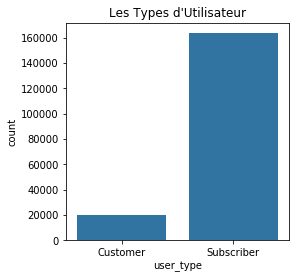

In [26]:
fig, ax = plt.subplots(figsize = [4,4])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = default_color)
plt.title("Les Types d'Utilisateur")
plt.show()

In [16]:
df.member_gender.value_counts().to_frame()

member_gender
Male           130651
Female          40844
Other            3652

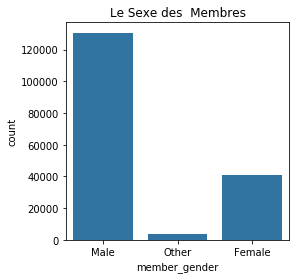

In [27]:
fig, ax = plt.subplots(figsize = [4,4])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = default_color)
plt.title("Le Sexe des  Membres")
plt.show()

In [17]:
df.bike_share_for_all_trip.value_counts().to_frame()

bike_share_for_all_trip
No                    166053
Yes                    17359

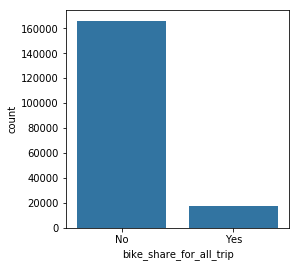

In [28]:
fig, ax = plt.subplots(figsize = [4,4])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color)
plt.title("")
plt.show()

In [36]:
df.start_station_name.duplicated().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: start_station_name, dtype: bool

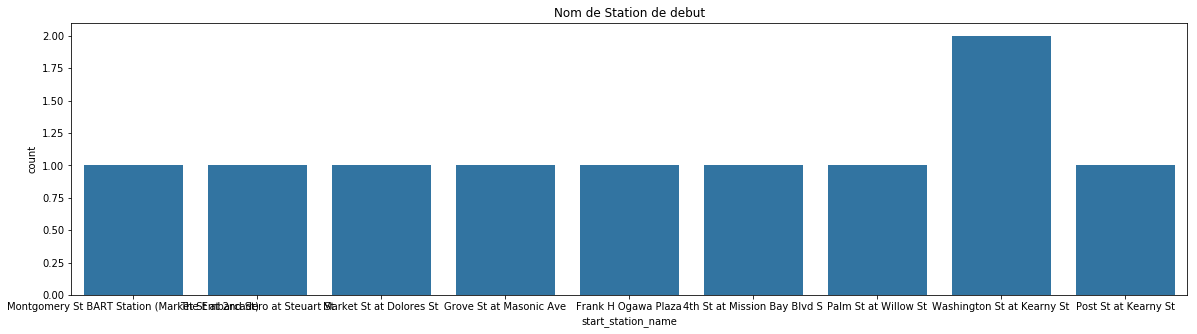

In [31]:
fig, ax = plt.subplots(figsize = [20,5])

default_color = sb.color_palette()[0]
sb.countplot(data = df.head(10), x = 'start_station_name', color = default_color)
plt.title("Nom de Station de debut")
plt.show()

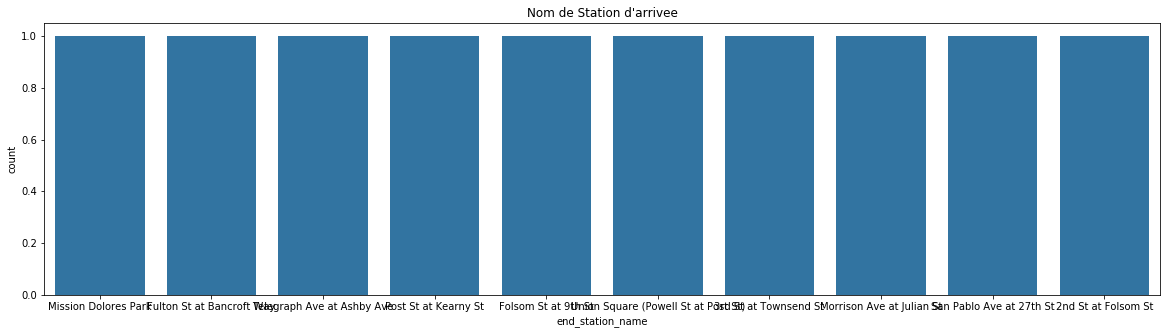

In [31]:
fig, ax = plt.subplots(figsize = [20,5])

default_color = sb.color_palette()[0]
sb.countplot(data = df.tail(10), x = 'end_station_name', color = default_color)
plt.title("Nom de Station d'arrivee")
plt.show()

Projection Horizontale

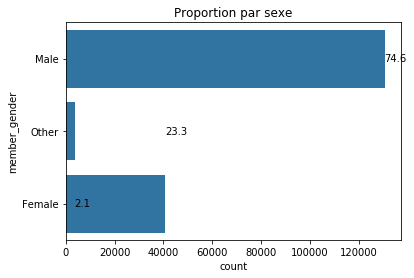

In [32]:
# En considérant le même graphique que dans l'exemple 1 ci-dessus, imprimer le texte (proportion) sur les barres.
type_counts = df['member_gender'].value_counts()
type_counts
n_pokemon = df['member_gender'].value_counts().sum()
#type_order = df['Male'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='member_gender', color=base_color);

# Logique pour imprimer le texte de proportion sur les barres
for i in range (type_counts.shape[0]):
# Rappelez-vous, type_counts contient la fréquence des valeurs uniques dans la colonne « type » par ordre décroissant.
    count = type_counts[i]
# Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
# Imprimer la valeur de la chaîne sur la barre.
# Apprenez-en plus sur les arguments de la fonction text() [ici](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')
    plt.title("Proportion par sexe")

Projection verticale

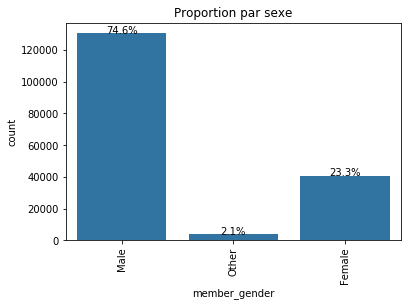

In [33]:
#from matplotlib import rcParams
# En considérant le même graphique que dans l'exemple 1 ci-dessus, imprimer le texte (proportion) EN DESSOUS des barres.
type_counts = df['member_gender'].value_counts()
type_counts
n_pokemon = df['member_gender'].value_counts().sum()
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=base_color);


# Recalculer les types_counts juste pour plus de clarté.
type_counts = df['member_gender'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=90)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    # Spécifier la taille de la figure en pouces, pour les axes X, et Y
    #rcParams['figure.figsize'] = 12,4
    plt.title("Proportion par sexe")

**Des visualisations ci-dessus, nous remarquons que:**
- les hommes sont plus representes que les femmes dans le dataset.
- Il y a plus de subscriber que de customer
- Il y a moins de bike_share_for_all_trip que de non

## Bivariate Exploration

In [20]:
numeric_vars = ['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year']
categoric_vars = ['end_station_name','start_station_name','user_type','member_gender','bike_share_for_all_trip']

- **Relation entre les variables numeriques**

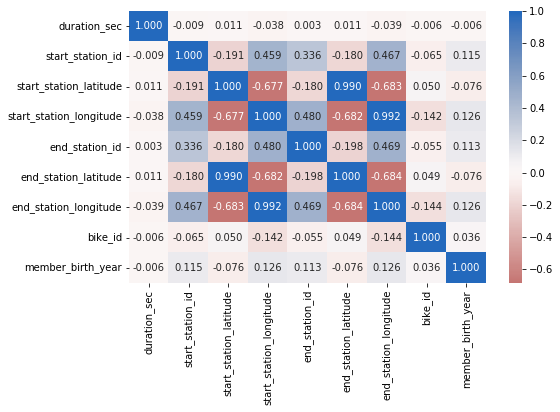

In [21]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

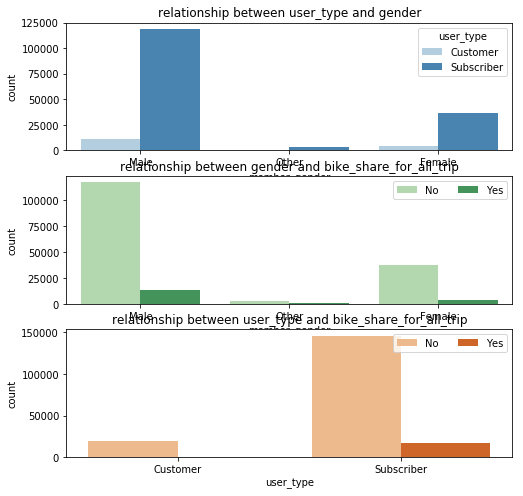

In [41]:
plt.figure(figsize = [8, 8])

# subplot 1: gender vs user_type
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Blues')
plt.title('relationship between user_type and gender')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.title('relationship between gender and bike_share_for_all_trip')

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Oranges')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title('relationship between user_type and bike_share_for_all_trip')
plt.show()

Text(0.5, 1.0, 'relationship between user_type and gender')

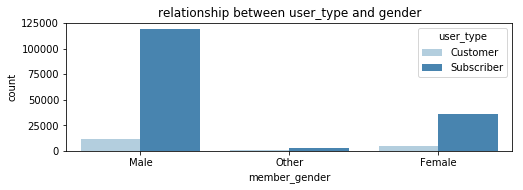

In [46]:
plt.figure(figsize = [8, 8])

# subplot 1: gender vs user_type
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Blues')
plt.title('relationship between user_type and gender')

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the on

<Figure size 720x720 with 0 Axes>

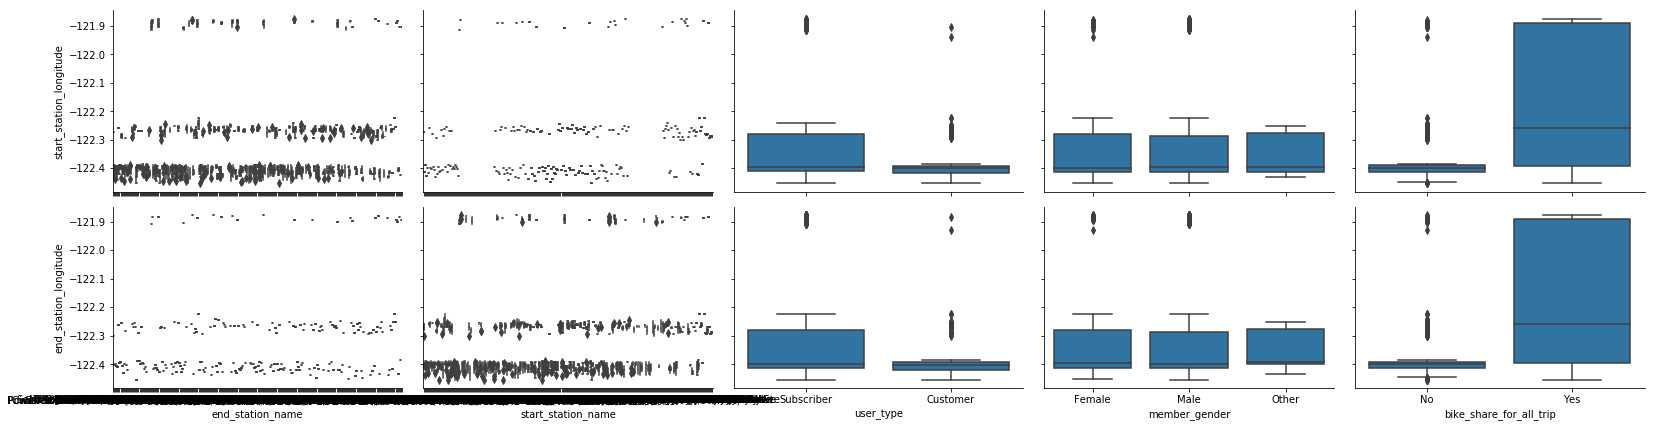

In [42]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
bike_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bike_samp, y_vars = ['start_station_longitude', 'end_station_longitude'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

## Multivariate Exploration

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


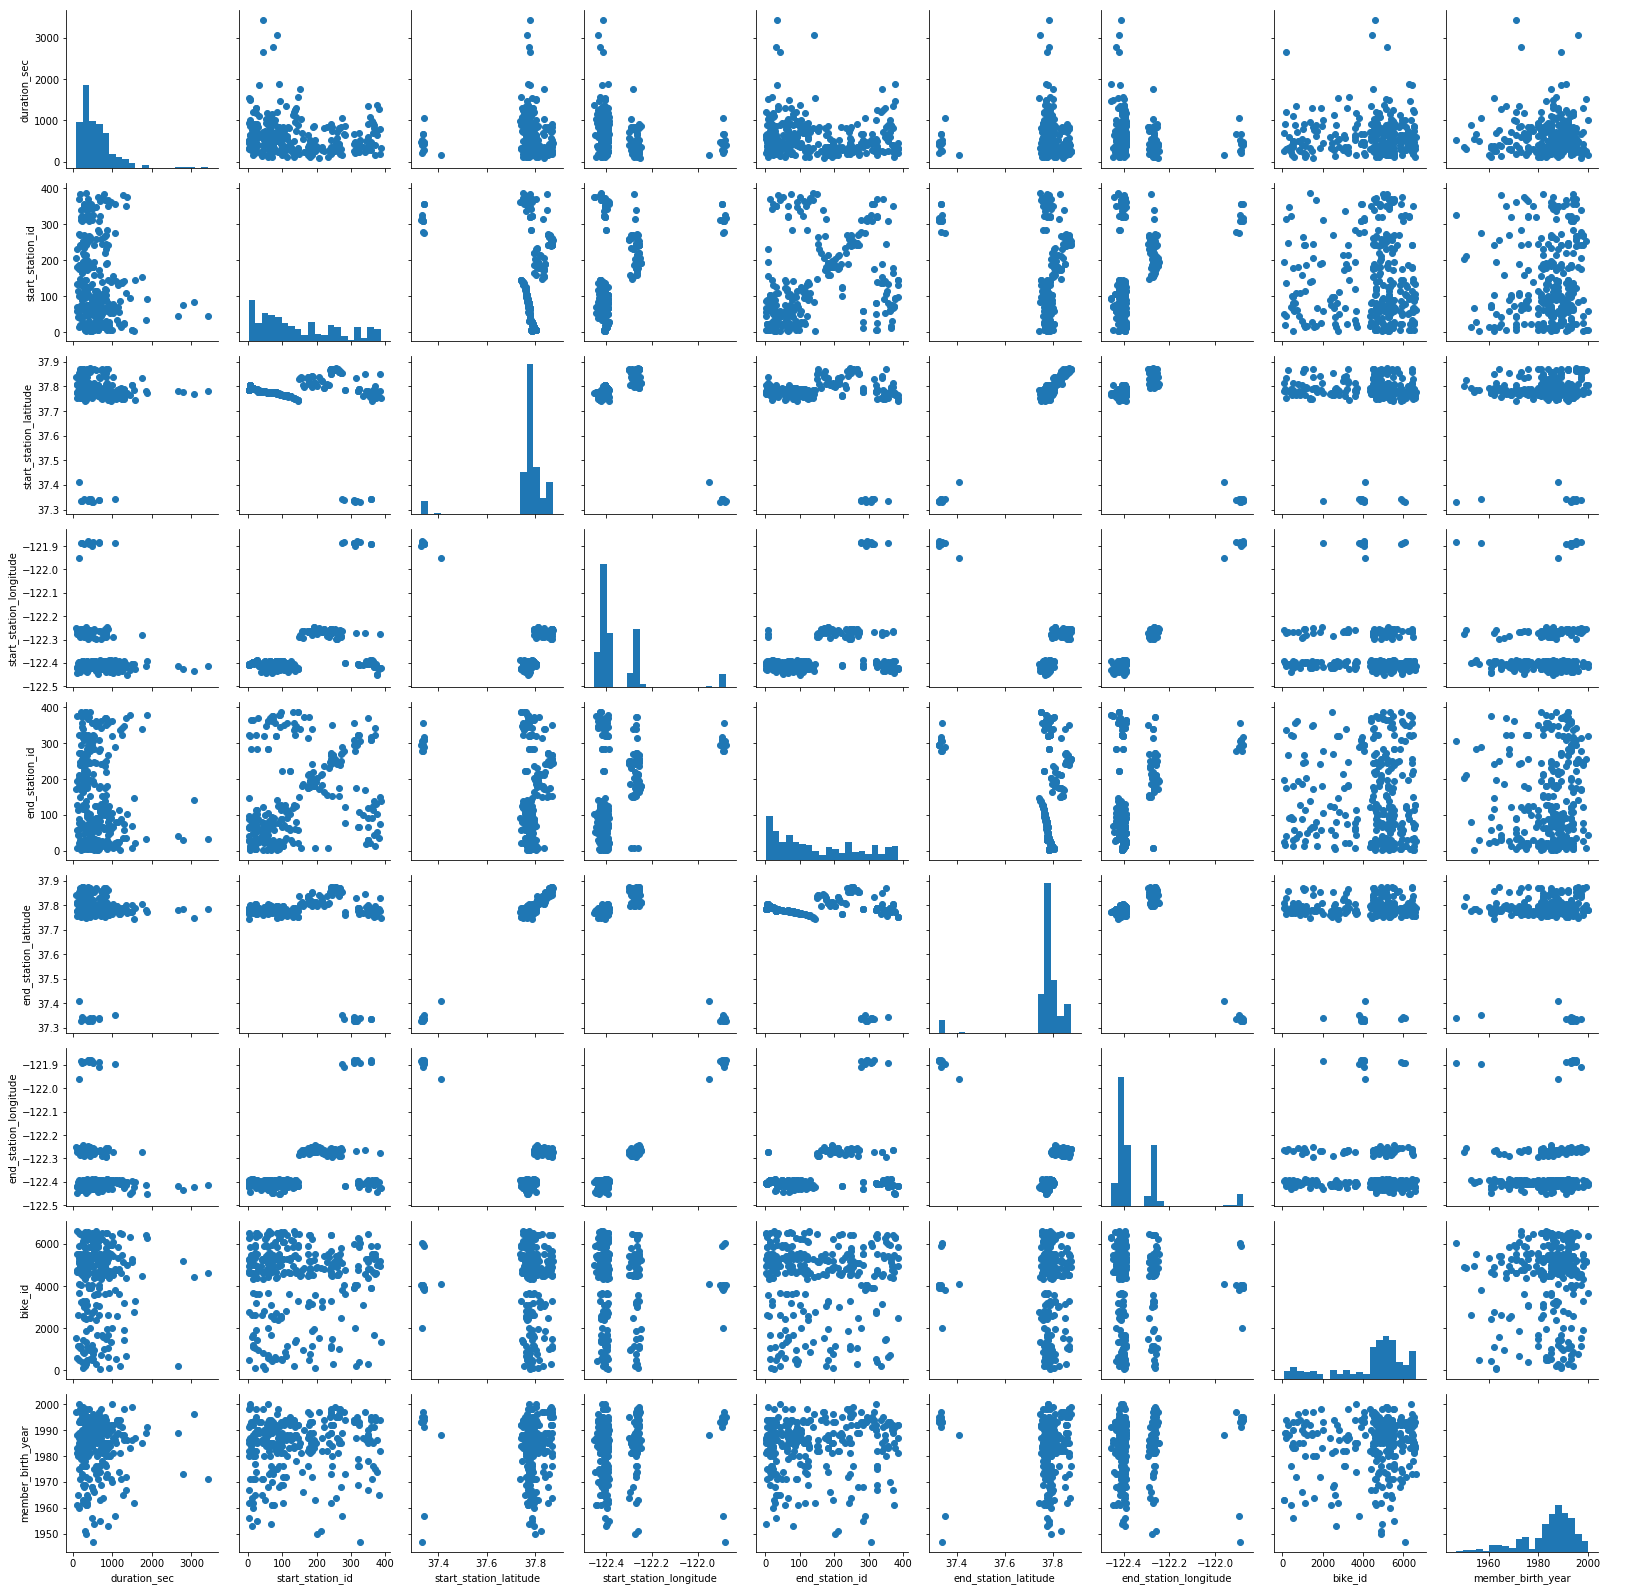

In [22]:
# plot matrix: sample 300 bike riding so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 300, replace = False)
bike_samp = df.loc[samples,:]

g = sb.PairGrid(data = bike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

## Conclusions
In Summary, many bike riders are largely males than females and they are also more subscriber than customer. 
The average trip took 726.08 seconds